### What is the best $k$ in $k$-means algorithm?

The **k-means** is an iterative partitioning algorithm that minimizes the sum of squared distances between data points and their respective centroids, aiming to solve the clustering problem in a metric space. It implicitly assumes that the clusters have an approximately spherical shape and that the number $k$ of clusters is known a priori.

Mathematically, the goal of $k$-means is to minimize the following cost function:

$$
J = \sum_{i=1}^k \sum_{x \in C_i} \| x - \mu_i \|^2,
$$

where $C_i$ is the set of points in cluster $i$ and $\mu_i$ is the corresponding centroid.

### Observations

1. **Convergence**:  
   The algorithm always converges to a local minimum of the objective function but does not guarantee finding the global minimum. The quality of the solution can strongly depend on the initialization of the centroids, making the algorithm sensitive to this choice.

2. **Computational Complexity**:  
   The $k$-means has a complexity of $O(n \cdot k \cdot t \cdot d)$, where $n$ is the number of points, $k$ the number of clusters, $t$ the number of iterations, and $d$ the dimensionality of the data.

3. **Limitations and Extensions**:  
   - The algorithm assumes that clusters are convex and isotropic, which may not be suitable for datasets with non-linear distributions or complex shapes.  

The main goal here is to implement the algorithm and determine the best choice for $k$. 


#### Importing libraries

In [2]:
from scipy.spatial import distance
import statistics
import matplotlib.pyplot as plt
import numpy as np

Classes: ['blue', 'red', 'red']
Classification: red


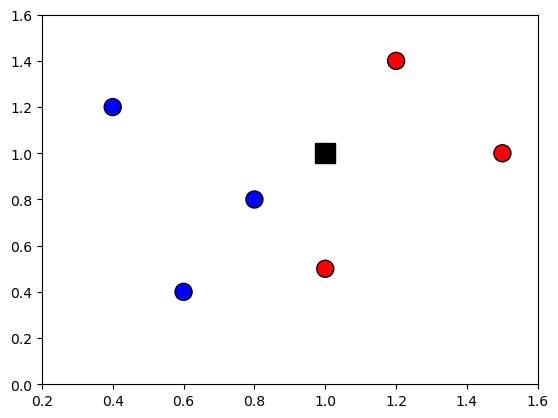

In [3]:
def knn(x_train, y_train, x_test, k):
    distances = [] #lista que armazena as distâncias
    x1 = x_test # elemento a ser classificado
    for x2 in x_train: # distancia entre a observacao elementos no conjunto de teste
        dist = distance.euclidean(x1,x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(0, k):
        ind = np.argmin(distances) #elemento no conjunto de teste mais proximo
        #print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances) 
        indices.append(ind)
        cl.append(y_train[ind]) #guarda a classe
    print("Classes:",cl)
    classification = statistics.mode(cl)# encontra a classe
    return classification

k=3 # numero de vizinhos
x_train = np.array([[1,0.5],[0.8,0.8],[1.2,1.4],[0.6,0.4],[0.4,1.2],[1.5,1]])
y_train = np.array(['red','blue','red','blue','blue','red'], dtype = 'str')
x_test = np.array([1,1])
# realiza a classificacao
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)
# mostra os dados
plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")
plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('knn.eps')

plt.show(True)

A região de separação definida pelo algoritmo forma células de Voronoi, como mostrado a seguir.

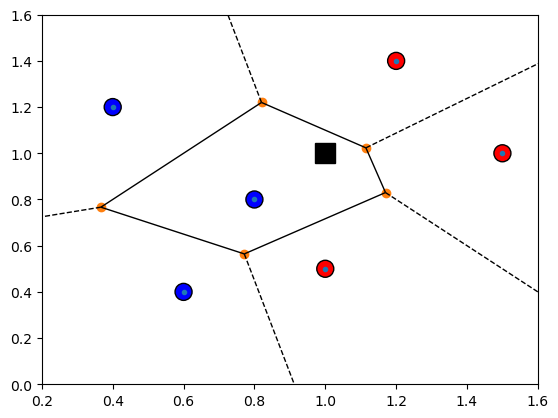

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('voronoi.eps')
plt.show()

In [20]:
pip install mlxtend --upgrade --no-deps

Note: you may need to restart the kernel to use updated packages.


**Decision Region**  
By selecting two attributes, we can visualize the decision region. To plot the separation region, the `mlxtend` library needs to be installed: [http://rasbt.github.io/mlxtend/installation/](http://rasbt.github.io/mlxtend/installation/).  
You can use the following command:  
`conda install -c conda-forge mlxtend`  

For the k-nearest neighbors method:  